#  Linear Regression

### Importing libraries

In [33]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

### Uploading data

In [34]:
url = "https://raw.githubusercontent.com/Agablue-red/Machine-Learning/master/data/Dataset.csv"
url_ln = 'https://raw.githubusercontent.com/Agablue-red/Machine-Learning/master/data/dataset_ln.csv'
url_ln_rate = 'https://raw.githubusercontent.com/Agablue-red/Machine-Learning/master/data/dataset_ln_rate.csv'

In [54]:
data = pd.read_csv(url_ln)
data.rename(columns = {'date':'Date'}, inplace = True)

In [55]:
data.head()

,symbol,sector,score,Date,close,return_rate
0,SU,Energy Minerals,0.953727,2004-02-11,2.586636,0.003225
1,GGG,Producer Manufacturing,0.952753,2004-02-11,2.239527,0.005236
2,CWT,Utilities,0.934181,2004-02-11,2.689207,0.001776
3,BLL,Process Industries,0.922862,2004-02-11,2.091247,0.001333
4,APA,Energy Minerals,0.912117,2004-02-11,3.684620,0.001574


In [56]:
nan_rows = data[data['return_rate'].isnull()]
if nan_rows.symbol.nunique() == len(nan_rows):
    print("NaN for first period")


NaN for first period


Replacing NaNs with 0 value:

In [57]:
data['return_rate'] = data['return_rate'].fillna(0)

Looking at the tail of the data, meaning the newest observations:

In [58]:
data.tail()

,symbol,sector,score,Date,close,return_rate
30228,PEP,Consumer Non-Durables,0.701507,2022-02-09,5.147146,-0.000090
30229,SSNC,Technology Services,0.701123,2022-02-09,4.411828,0.004718
30230,GEF,Process Industries,0.697954,2022-02-09,4.041822,-0.004078
30231,DPZ,Consumer Services,0.697741,2022-02-09,6.097535,0.002244
30232,LIFZF,Non-Energy Minerals,0.695644,2022-02-09,3.538347,0.007034


### Information about dataset

Data types:

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30233 entries, 0 to 30232
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       30233 non-null  object 
 1   sector       30233 non-null  object 
 2   score        30233 non-null  float64
 3   Date         30233 non-null  object 
 4   close        30233 non-null  float64
 5   return_rate  30233 non-null  float64
dtypes: float64(3), object(3)
memory usage: 1.4+ MB


Checking if there is any lack of data:

In [60]:
data.isnull().sum()

symbol         0
sector         0
score          0
Date           0
close          0
return_rate    0
dtype: int64

Changing the type of 'date' variable:

In [61]:
data['Date'] = pd.to_datetime(data['Date'], format = '%Y-%m-%d')
data = data.set_index('Date')

#### Fundamental statistics on numeric variables

In [62]:
data.describe()

,score,close,return_rate
count,30233.000000,30233.000000,30233.000000
mean,0.731057,3.800308,0.000179
std,0.117771,0.943261,0.020259
min,0.413554,-3.912023,-1.228699
25%,0.653484,3.258097,-0.002116
50%,0.741352,3.800868,0.000053
75%,0.813416,4.308111,0.002407
max,0.987225,12.997310,2.577882


There are in total 30 551 observations. The mean score for this dataset is 0,73, mean closing price is 101,3 and mean return rate is 0,004.

In [63]:
data.symbol.value_counts()

SHW      169
GEF      140
ORLY     138
INGR     122
GPC      122
        ... 
EHTH       1
CWYUF      1
IONS       1
ABM        1
AGCO       1
Name: symbol, Length: 1333, dtype: int64

There are 1338 companies in total, some of them occur only once in the time series and some even over 100 times. 

### Splitting the data into training and testing sets

Training set involves data from 2010 to 2020 and testing set includes the year 2021.


In [64]:
X_train = data['2010':'2020'].drop(['symbol','sector','return_rate', 'close'], axis = 1)
y_train = data.loc['2010':'2020', 'return_rate']

X_test = data['2021'].drop(['symbol','sector','return_rate', 'close'], axis = 1)
y_test = data.loc['2021', 'return_rate']

C:\Users\bartek\AppData\Local\Temp/ipykernel_5716/2152590176.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_test = data['2021'].drop(['symbol','sector','return_rate', 'close'], axis = 1)


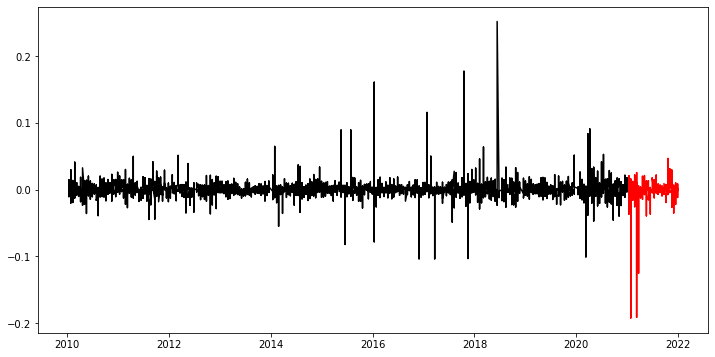

In [65]:
fig, ax=plt.subplots(figsize=(12, 6))

plt.plot(y_train, color = "black")
plt.plot(y_test, color = "red")

In [66]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (19508, 1)
Number transactions y_train dataset:  (19508,)
Number transactions X_test dataset:  (2045, 1)
Number transactions y_test dataset:  (2045,)


### Dummy regression

In [67]:
from sklearn.dummy import DummyRegressor

In [68]:
# train model
reg_dummy = DummyRegressor(strategy = 'mean').fit(X_train, y_train) 

print('Coefficient of determination:', reg_dummy.score(X_train, y_train))

Coefficient of determination: 0.0


0% represents a model that does not explain any of the variation in the response variable around its mean.

In [69]:
# predict & evaluate
y_pred_dum = reg_dummy.predict(X_test)

print("Coefficient of determination (R2): %.5f" % r2_score(y_test , y_pred_dum) )
print("Mean absolute error (MAE): %.5f" % np.mean(np.absolute(y_pred - y_pred_dum)))
print("Residual sum of squares (MSE): %.5f" % mean_squared_error(y_test, y_pred_dum))
print("Root mean squared error (RMSE): %.5f" % np.sqrt(metrics.mean_squared_error(y_test, y_pred_dum)))

Coefficient of determination (R2): -0.00277
Mean absolute error (MAE): 0.00054
Residual sum of squares (MSE): 0.00007
Root mean squared error (RMSE): 0.00849


### Linear regression

In [70]:
from sklearn import metrics

# train model
lm = LinearRegression().fit(X_train, y_train)

print('Coefficient of determination:', lm.score(X_train, y_train))
print('Intercept:', lm.intercept_)
print('Slope:', lm.coef_)

Coefficient of determination: 0.0020811687384024724
Intercept: 0.0019824525873071474
Slope: [-0.0025008]


f(x) = b₁x + b₀

f(x) = - 0.027x + 0.024

𝑅² = 0.0054

Model explains only 0.0054 of the variation in the response variable around its mean.

**Measure of fit of a model**

In [71]:
# predict & evaluate
y_pred = lm.predict(X_test)

print('predicted response:', y_pred, sep='\n')

print("Coefficient of determination (R2): %.5f" % r2_score(y_test , y_pred) )
print("Mean absolute error (MAE): %.5f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.5f" % mean_squared_error(y_test, y_pred))
print("Root mean squared error (RMSE): %.5f" % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

predicted response:
[-0.00031338 -0.00027265 -0.00025967 ...  0.00020419  0.00020704
  0.00021006]
Coefficient of determination (R2): -0.00304
Mean absolute error (MAE): 0.00357
Residual sum of squares (MSE): 0.00007
Root mean squared error (RMSE): 0.00849


Adjusted R squared  is adjusted for the number of independent variables in the model and equal -0.00431 (adjusted  R² will always be less than or equal to R²).

The average of the residuals equal 0.031.

The variance of the residuals equal 0.00178.

The standard deviation of residuals equal 0.0422.

### Comparison between dummy regression and linear regression in combination with observations from test set.

InvalidIndexError: (slice(None, None, None), None)

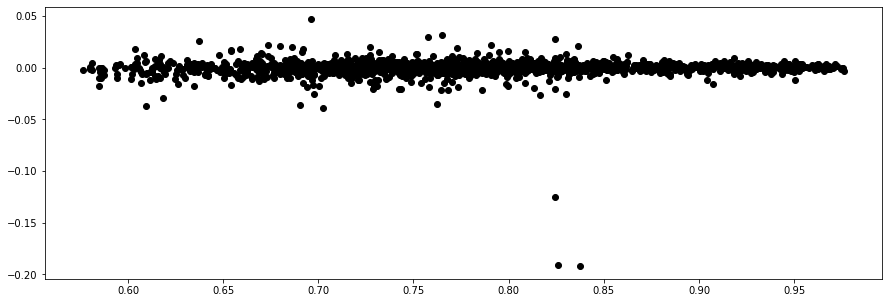

In [72]:
fig, ax=plt.subplots(figsize=(15, 5))

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Linear regression')
plt.plot(X_test, y_pred_dum, color='blue', linestyle = 'dashed', linewidth=2, label = 'Dummy regression')
ax.legend()

Model does not explain any of the variation in the response variable around its mean.

Linear regression is marginally better than dummy regression.

Both models are not well fit.